Link data
https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing?resource=download

Link powerpoint
https://view.genial.ly/6380e9483e8969001affb39c/presentation-gradient-presentation

In [ ]:
from google.colab import drive
drive.mount('/content.drive/')

Drive already mounted at /content.drive/; to attempt to forcibly remount, call drive.mount("/content.drive/", force_remount=True).


In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content.drive/MyDrive/Banking predict/excel/bank-additional-full.xlsx', dtype={'age': int,'duration': int,'pdays': int ,'campaign': int,'previous': int})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",yes


**Bank client data:**

Age (numeric)

Job : type of job (categorical: ‘admin.’, ‘blue-collar’, ‘entrepreneur’, ‘housemaid’, ‘management’, ‘retired’, ‘self-employed’, ‘services’, ‘student’, ‘technician’, ‘unemployed’, ‘unknown’)

Marital : marital status (categorical: ‘divorced’, ‘married’, ‘single’, ‘unknown’ ; note: ‘divorced’ means divorced or widowed)

Education (categorical: ‘basic.4y’, ‘basic.6y’, ‘basic.9y’, ‘high.school’, ‘illiterate’, ‘professional.course’, ‘university.degree’, ‘unknown’)

Default: has credit in default? (categorical: ‘no’, ‘yes’, ‘unknown’)

Housing: has housing loan? (categorical: ‘no’, ‘yes’, ‘unknown’)

Loan: has personal loan? (categorical: ‘no’, ‘yes’, ‘unknown’)

**Related with the last contact of the current campaign:**

Contact: contact communication type (categorical: ‘cellular’,‘telephone’)

Month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

Day_of_week: last contact day of the week (categorical: ‘mon’,‘tue’,‘wed’,‘thu’,‘fri’)

Duration: last contact duration, in seconds (numeric)

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

**Other attributes (Previous campaign) :**

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,‘nonexistent’,‘success’)

**Social and economic context attributes**

Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric) Output variable (desired target):

y: has the client subscribed a term deposit? (binary: ‘yes’, ‘no’)

In [ ]:
#infor before changing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.nunique()

age                 78
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

age               0.00 %
job               0.80 %
marital           0.19 %
education         4.20 %
default          20.87 %
housing           2.40 %
loan              2.40 %
contact           0.00 %
month             0.00 %
day_of_week       0.00 %
duration          0.00 %
campaign          0.00 %
pdays             0.00 %
previous          0.00 %
poutcome          0.00 %
emp.var.rate      0.00 %
cons.price.idx    0.00 %
cons.conf.idx     0.00 %
euribor3m         0.00 %
nr.employed       0.00 %
y                 0.00 %
dtype: float64


In [ ]:
df.describe().style.background_gradient()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#Checking out the categories and their respective counts in each feature
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no     32588
yes        3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes    21576
no     18622
Name: housing, dtype: int64
----------------------------------------
Personal loan:
no     33950
yes     6248
Name: 

In [ ]:
# df = df.replace("Nan","")
# df.to_excel("/content.drive/MyDrive/Banking predict/excel/bank-additional-full.xlsx")
# df

In [ ]:
print("DF :",df.duplicated().value_counts(),sep = '\n')
df1 = df.drop_duplicates()
print("-"*40)
print("DF1 :",df1.duplicated().value_counts(),sep = '\n')

DF :
False    41176
True        12
dtype: int64
----------------------------------------
DF1 :
False    41176
dtype: int64


In [ ]:
df2 = df1.drop(['default'],axis=1)

In [ ]:
df3 = df2.dropna()

In [ ]:
df3.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df3.loc[df.pdays == 999, 'pdays'] = 0
df3.pdays.value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0     36883
3       393
6       379
4       106
2        57
9        55
12       53
7        52
5        45
10       44
13       33
11       26
1        24
15       22
14       18
8        14
16        8
17        6
18        5
22        3
19        3
21        2
25        1
26        1
27        1
Name: pdays, dtype: int64

In [ ]:
df3.y = df3.y.map({'no':0, 'yes':1}).astype('int')
df3.poutcome = df3.poutcome.map({'failure':0, 'success':1, 'nonexistent': 3}).astype('int')
df3[['poutcome', 'y']]

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,poutcome,y
0,3,0
1,3,0
2,3,0
3,3,0
4,3,0
...,...,...
41183,3,1
41184,3,0
41185,3,0
41186,3,1


In [ ]:
df4 = df3
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38234 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38234 non-null  int64  
 1   job             38234 non-null  object 
 2   marital         38234 non-null  object 
 3   education       38234 non-null  object 
 4   housing         38234 non-null  object 
 5   loan            38234 non-null  object 
 6   contact         38234 non-null  object 
 7   month           38234 non-null  object 
 8   day_of_week     38234 non-null  object 
 9   duration        38234 non-null  int64  
 10  campaign        38234 non-null  int64  
 11  pdays           38234 non-null  int64  
 12  previous        38234 non-null  int64  
 13  poutcome        38234 non-null  int64  
 14  emp.var.rate    38234 non-null  float64
 15  cons.price.idx  38234 non-null  float64
 16  cons.conf.idx   38234 non-null  float64
 17  euribor3m       38234 non-null 

In [ ]:
df4.describe().style.background_gradient()

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000
mean,39.860438,258.236282,2.566930,0.213083,0.170058,2.626144,0.082934,93.570380,-40.541515,3.623337,5167.433156,0.111341
std,10.288704,259.818894,2.767777,1.318829,0.487231,0.957498,1.565854,0.576360,4.622785,1.730204,71.759739,0.314558
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,0.000000,0.000000,3.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,0.000000,0.000000,3.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000,0.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,43.000000,27.000000,7.000000,3.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


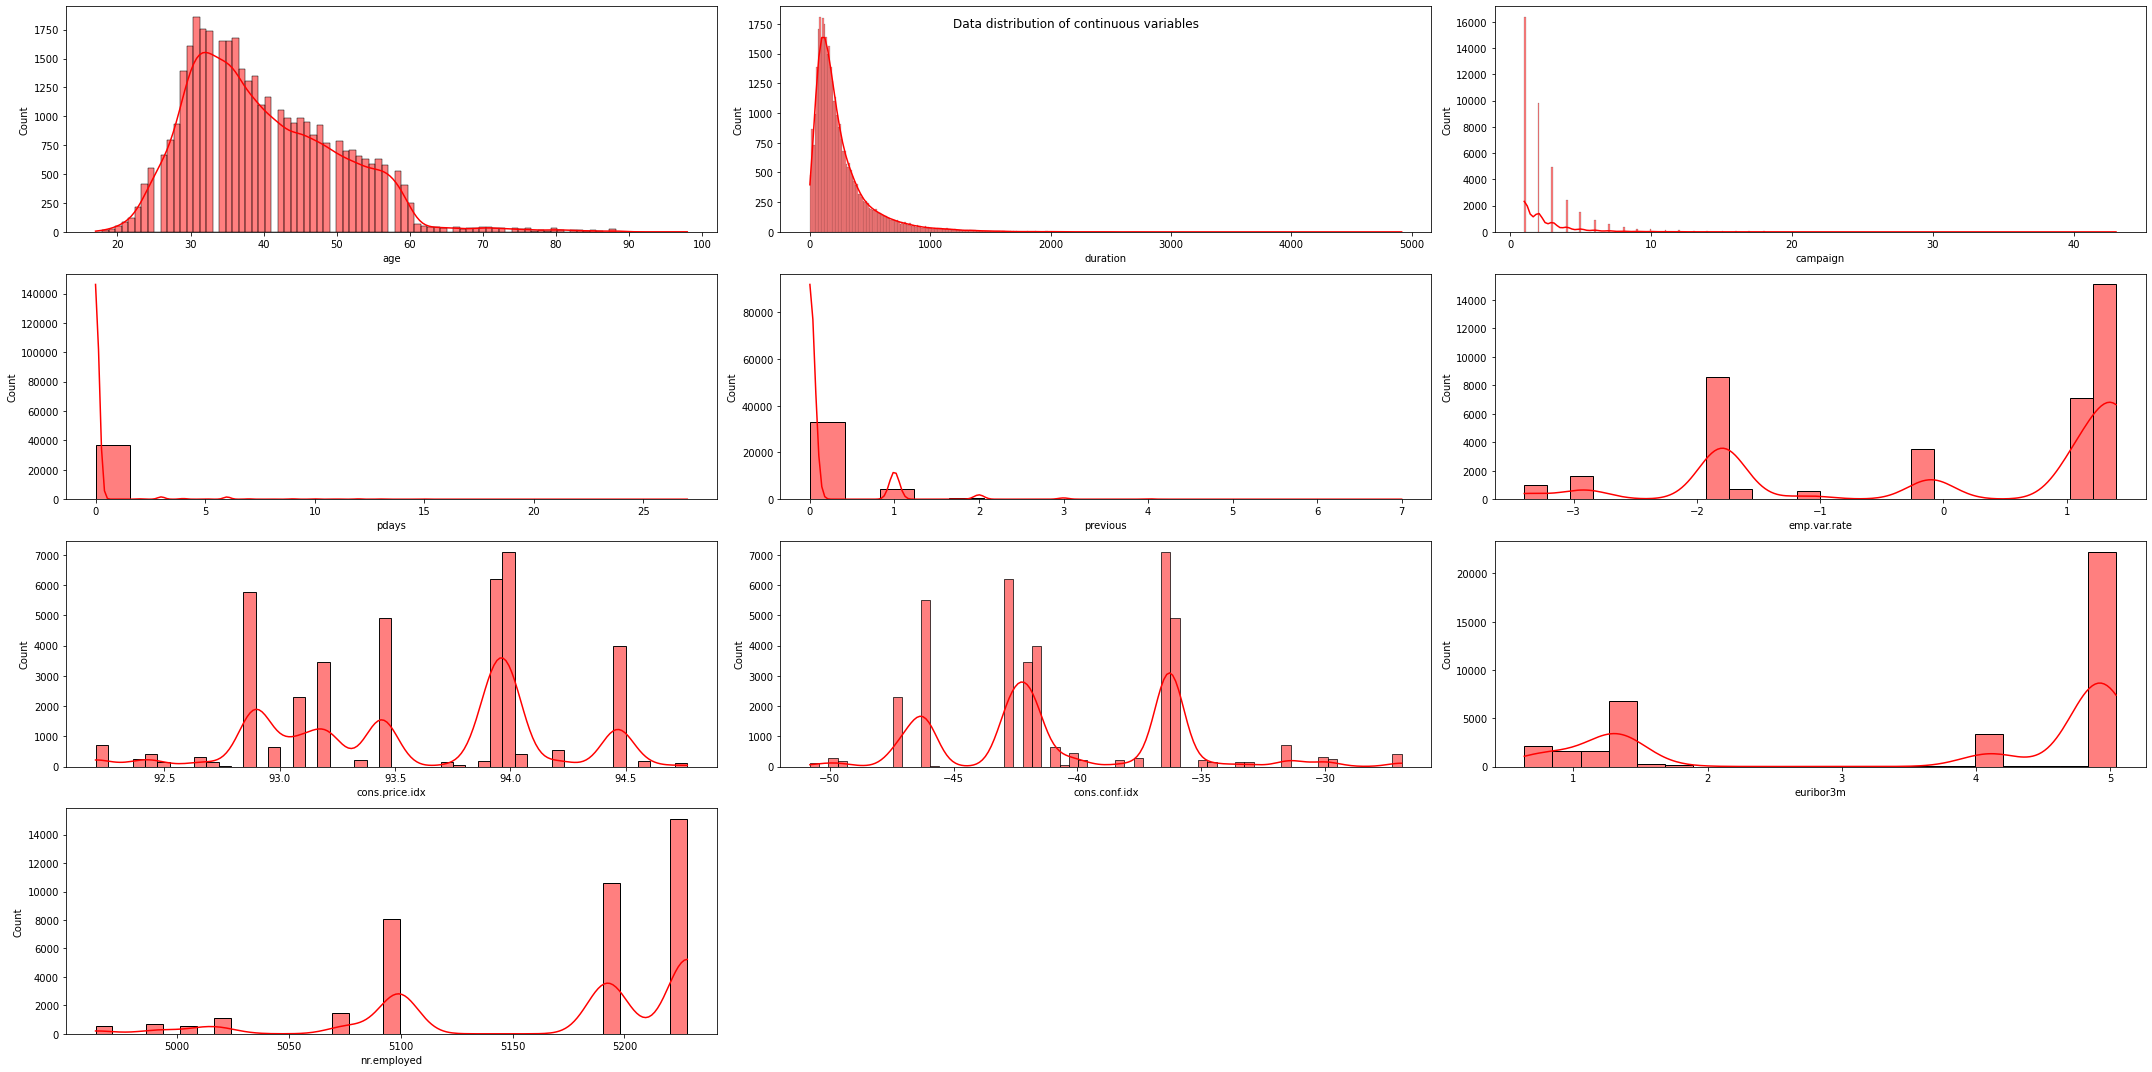

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(30, 15))
for i, col in enumerate(df4.drop(['y','poutcome'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df4, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

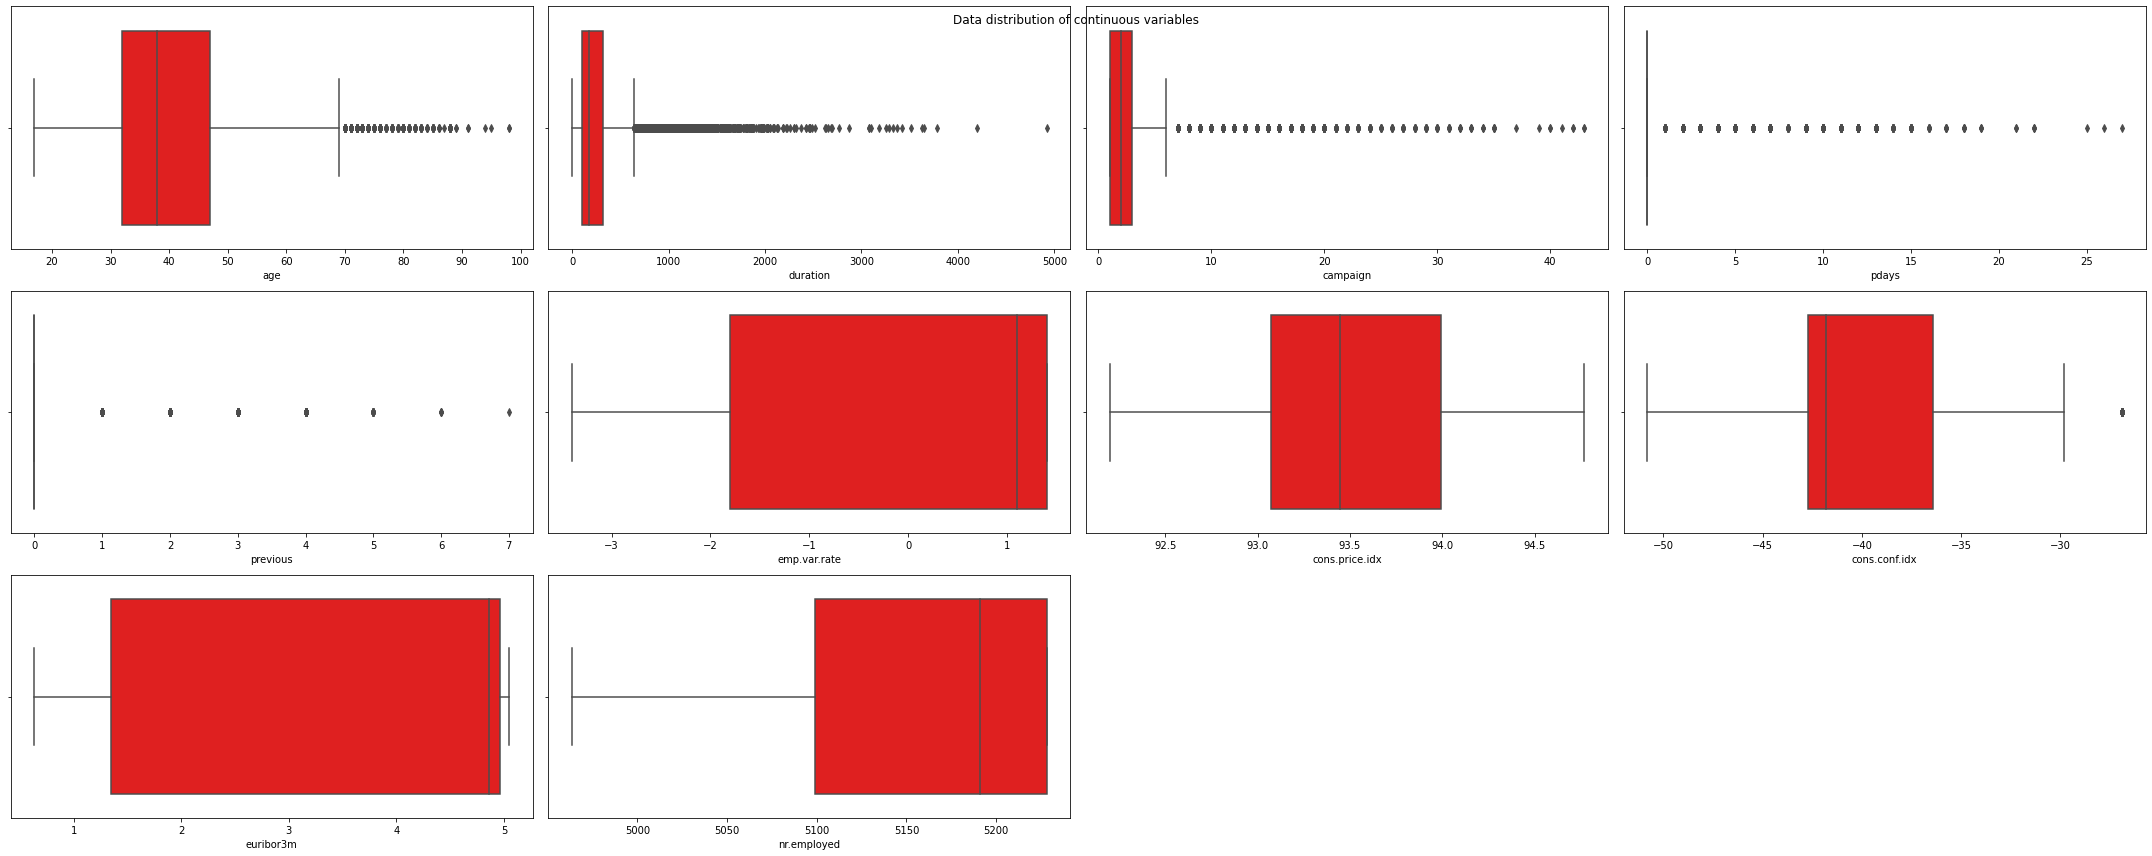

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(30, 12))
for i, col in enumerate(df4.drop(['y','poutcome'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(3,4, i+1)
    sns.boxplot(data=df4, x=col, ax=ax,color='red')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [ ]:
df4 = df3
def bounds(x):
    q3, q1 = np.quantile(x,0.75) , np.quantile(x,0.25)
    IOR = q3 - q1
    return [q1 - 1.5*IOR, q3 + 1.5*IOR]

upper = bounds(df4["campaign"])[1]
df4[df4["campaign"] > upper]
# df10 = df4[df4["campaign"] < upper]

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54,admin.,married,university.degree,no,no,telephone,may,wed,388,7,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",0
1043,41,technician,single,university.degree,no,no,telephone,may,wed,79,8,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",0
1094,40,technician,married,professional.course,yes,no,telephone,may,wed,253,8,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",0
1097,51,blue-collar,married,basic.4y,yes,no,telephone,may,wed,244,7,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",0
1230,48,blue-collar,divorced,basic.4y,no,no,telephone,may,thu,521,7,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,75,retired,married,basic.9y,no,no,telephone,sep,fri,543,9,0,1,0,-1.10,94.20,-37.50,0.88,"4,963.60",0
40631,88,retired,married,basic.4y,yes,no,cellular,sep,mon,213,7,0,0,3,-1.10,94.20,-37.50,0.88,"4,963.60",0
40698,29,technician,single,professional.course,yes,no,cellular,sep,mon,157,7,3,5,1,-1.10,94.20,-37.50,0.88,"4,963.60",0
40821,33,technician,single,professional.course,yes,no,cellular,sep,fri,246,9,0,2,0,-1.10,94.20,-37.50,0.88,"4,963.60",0


In [ ]:
upper = bounds(df4["duration"])[1]
df4[df4["duration"] > upper]

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37,52,technician,married,basic.9y,yes,no,telephone,may,mon,1666,1,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",0
57,45,services,married,high.school,yes,no,telephone,may,mon,787,1,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",0
61,51,blue-collar,married,basic.9y,yes,no,telephone,may,mon,812,1,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",0
75,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",1
83,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,0,0,3,1.10,93.99,-36.40,4.86,"5,191.00",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,technician,single,professional.course,yes,no,cellular,nov,fri,712,2,19,1,1,-1.10,94.77,-50.80,1.04,"4,963.60",1
41153,67,housemaid,divorced,professional.course,yes,no,cellular,nov,mon,655,2,5,5,1,-1.10,94.77,-50.80,1.04,"4,963.60",1
41160,33,admin.,married,university.degree,no,no,cellular,nov,tue,843,1,0,0,3,-1.10,94.77,-50.80,1.03,"4,963.60",1
41164,54,admin.,married,professional.course,no,no,cellular,nov,tue,1868,2,10,1,1,-1.10,94.77,-50.80,1.03,"4,963.60",1


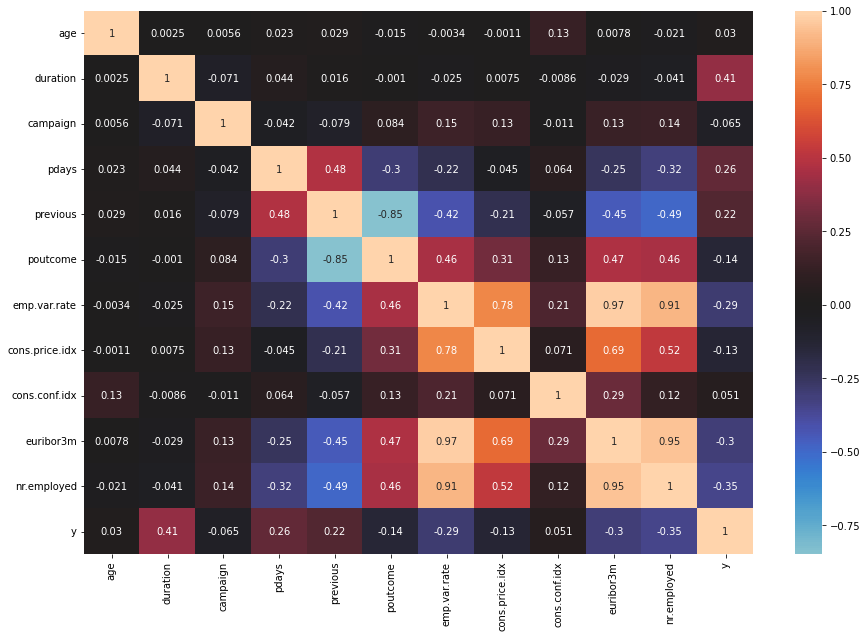

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df4.select_dtypes(include=['int','float']).corr(),annot=True,center = 0)
plt.show()

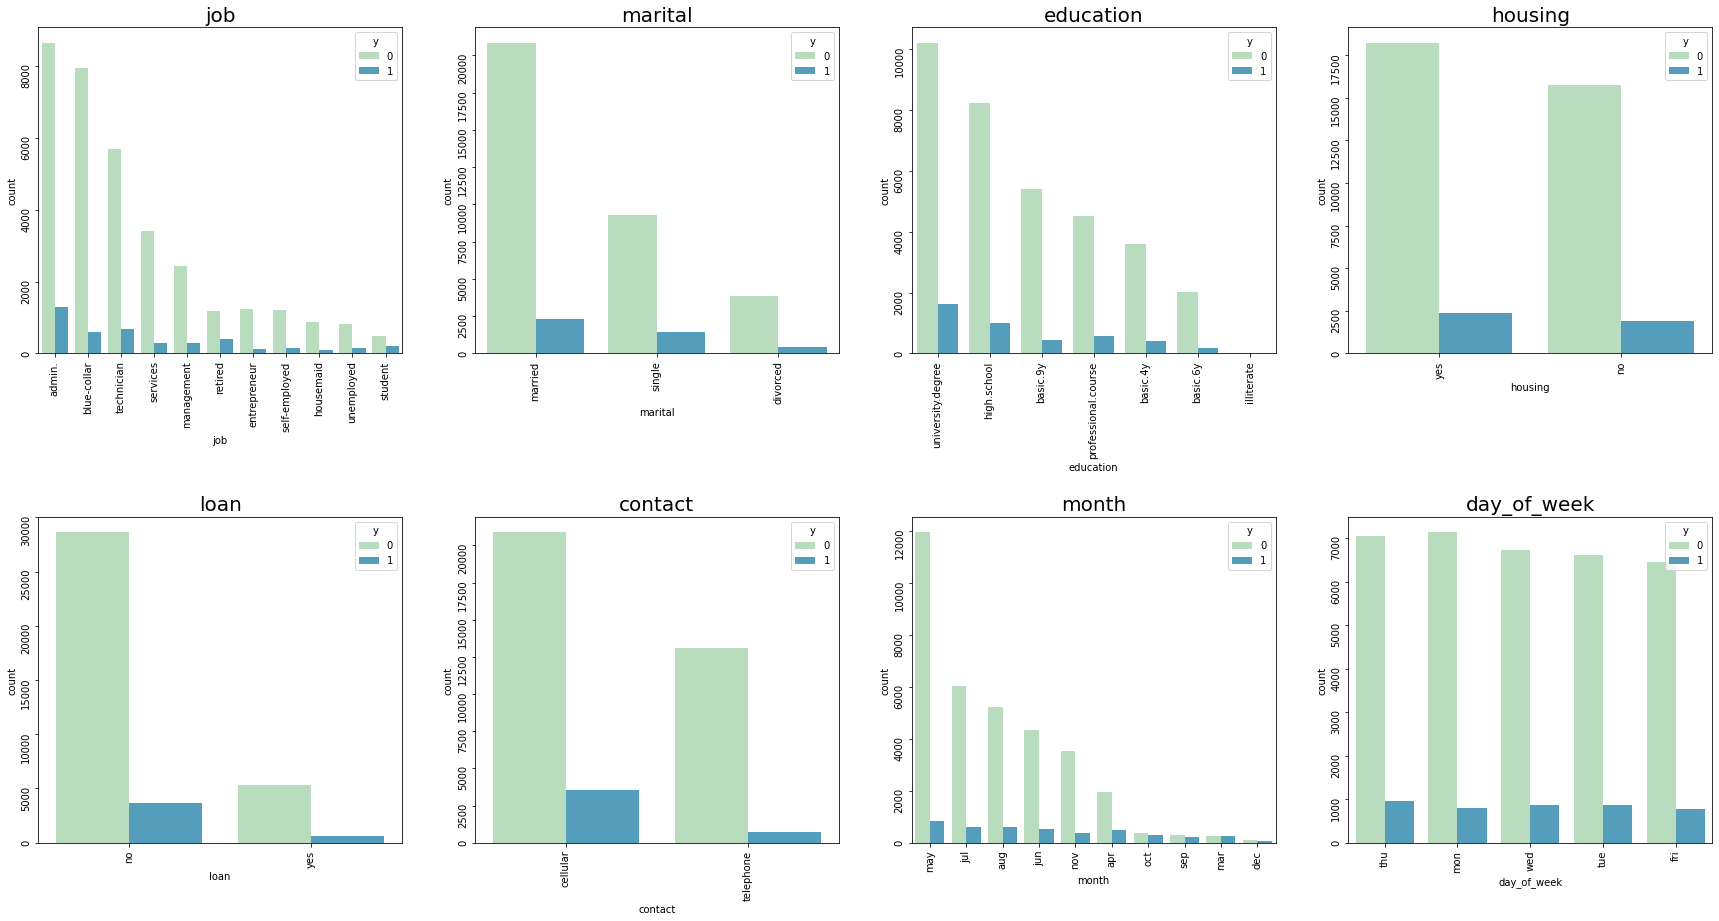

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(30, 15))
cate = df4.select_dtypes('object').columns.to_list()
cate = cate
ax = ax.ravel()
position = 0
for i in cate:
    order = df[i].value_counts().index
    sns.countplot(data=df4, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':20})

    position += 1

plt.subplots_adjust(hspace=0.5)

plt.show()

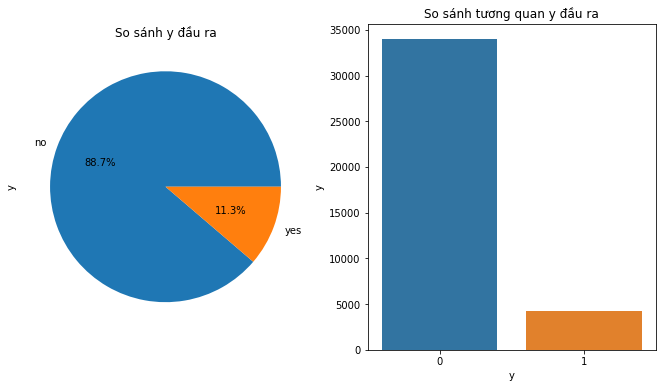

In [ ]:
plt.figure(figsize=(30, 6))
target_var=pd.crosstab(index=df4['y'],columns='y')

plt.subplot(1, 5, 1)
df.y.value_counts().plot.pie(autopct="%1.1f%%")
plt.title('So sánh y đầu ra')

plt.subplot(1, 5, 2)
sns.barplot(x=target_var.index,y=target_var['y'])
plt.title('So sánh tương quan y đầu ra')

plt.show()

In [ ]:
df5=pd.get_dummies(df4,drop_first=True)

In [ ]:
X=df5.drop(['y'],axis=1)
y=df5['y']

In [ ]:
X.head()

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,261,1,0,0,3,1.10,93.99,-36.40,4.86,...,0,0,1,0,0,0,1,0,0,0
1,57,149,1,0,0,3,1.10,93.99,-36.40,4.86,...,0,0,1,0,0,0,1,0,0,0
2,37,226,1,0,0,3,1.10,93.99,-36.40,4.86,...,0,0,1,0,0,0,1,0,0,0
3,40,151,1,0,0,3,1.10,93.99,-36.40,4.86,...,0,0,1,0,0,0,1,0,0,0
4,56,307,1,0,0,3,1.10,93.99,-36.40,4.86,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


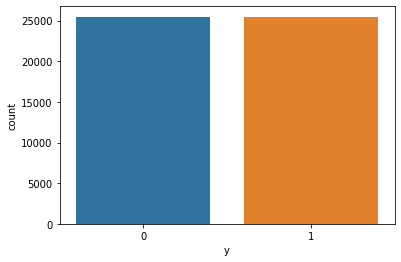

In [ ]:
sns.countplot(y_train)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [ ]:
model_comparison={}

In [ ]:
#Logistic Regression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Logistic Regression']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 85.10%
Model F1-Score : 83.10%
Cross Val Accuracy: 85.48 %
Cross Val Standard Deviation: 0.27 %
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      7411
           1       0.84      0.42      0.56      2148

    accuracy                           0.85      9559
   macro avg       0.85      0.70      0.73      9559
weighted avg       0.85      0.85      0.83      9559



In [ ]:
#Decision Tree
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 88.61%
Model F1-Score : 88.56%
Cross Val Accuracy: 91.40 %
Cross Val Standard Deviation: 13.50 %
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8474
           1       0.50      0.49      0.49      1085

    accuracy                           0.89      9559
   macro avg       0.72      0.71      0.71      9559
weighted avg       0.89      0.89      0.89      9559



In [ ]:
#Naive Bayes
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 75.70%
Model F1-Score : 71.52%
Cross Val Accuracy: 77.44 %
Cross Val Standard Deviation: 0.47 %
              precision    recall  f1-score   support

           0       0.75      0.97      0.85      6626
           1       0.79      0.29      0.42      2933

    accuracy                           0.76      9559
   macro avg       0.77      0.63      0.63      9559
weighted avg       0.76      0.76      0.72      9559



In [ ]:
#Rừng ngẫu nhiên
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 90.19%
Model F1-Score : 90.44%
Cross Val Accuracy: 93.72 %
Cross Val Standard Deviation: 5.73 %
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8611
           1       0.50      0.57      0.53       948

    accuracy                           0.90      9559
   macro avg       0.73      0.75      0.74      9559
weighted avg       0.91      0.90      0.90      9559



In [ ]:
#Xg Boost
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 90.25%
Model F1-Score : 89.78%
Cross Val Accuracy: 91.88 %
Cross Val Standard Deviation: 5.47 %
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8223
           1       0.69      0.55      0.61      1336

    accuracy                           0.90      9559
   macro avg       0.81      0.75      0.78      9559
weighted avg       0.90      0.90      0.90      9559



In [ ]:
#So sánh
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Random Forest,90.19%,90.44%,93.72%,5.73%
Xg Boost,90.25%,89.78%,91.88%,5.47%
Decision Tree,88.61%,88.56%,91.40%,13.50%
Logistic Regression,85.10%,83.10%,85.48%,0.27%
Naive Bayes,75.70%,71.52%,77.44%,0.47%
